# Business problem
- OBJECTIVE: Forecast customer demand based on historical sales and related data from a retailer.
             The goal of this competition is to develop a model that predicts customer demand for a given set of products across multiple stores. Your predictions will help optimize stock management and reduce operational inefficiencies.

- KEY QUESTIONS: What is the goal?
                 What will the success criteria? The competition uses Root Mean Squared Error (RMSE) as the evaluation metric.


# Stakeholders
- Retail Store Managers: Responsible for managing inventory and ensuring stock availability.
- Supply Chain Team: Focused on optimizing logistics and stock replenishment.
- Marketing Team: Interested in understanding the impact of promotions and markdowns on sales.
- Data Science Team: Responsible for building and maintaining the demand forecasting model.
- Executive Leadership: Interested in high-level insights and overall business performance.
- Customers: Indirect stakeholders who benefit from better stock availability and pricing.

# Data Understanding
- Data description: The dataset consists of sales information, price changes, promotions, markdowns, and product catalog details.
- Data Sources: Kaggle - https://www.kaggle.com/competitions/ml-zoomcamp-2024-competition/data 
- Data timeline : 25 months of sales data from four stores and predict the demand for products in the next month. 

## Expected Outcome:
- Develop a robust demand forecasting model that accurately predicts customer demand for products across multiple stores.
- Provide actionable insights to optimize inventory management, reduce stockouts, and minimize overstock situations.
- Enable better decision-making for promotions, markdowns, and pricing strategies.

## Success Criteria:
- Achieve a low Root Mean Squared Error (RMSE) on the test dataset, as RMSE is the evaluation metric for this competition.
- Ensure the model generalizes well to unseen data and performs consistently across different stores and product categories.
- Deliver a solution that is interpretable and actionable for stakeholders, including retail managers and supply chain teams.

# Explore data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse

# Function to display csv file

In [2]:
sales_df = pd.read_csv('C:/Users/angel/OneDrive/Desktop/project/Data/ml-zoomcamp-2024-competition/sales.csv')
sales_df.head(10)

,Unnamed: 0,date,item_id,quantity,price_base,sum_total,store_id
0,0,2023-08-04,293375605257,1.000,47.86,47.86,1
1,1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1
2,2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1
3,3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1
4,4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1
5,5,2023-08-04,be3b7250209f,1.000,129.90,129.90,1
6,6,2023-08-04,651c34ed4958,1.000,89.90,89.90,1
7,7,2023-08-04,7390a33d7f34,2.000,119.90,239.80,1
8,8,2023-08-04,d2f975315972,1.000,89.90,89.90,1
9,9,2023-08-04,d788cc0f8e2a,5.000,159.90,799.50,1


In [3]:
online_df = pd.read_csv('C:/Users/angel/OneDrive/Desktop/project/Data/ml-zoomcamp-2024-competition/online.csv')
online_df.head(10)

,Unnamed: 0,date,item_id,quantity,price_base,sum_total,store_id
0,0,2023-08-04,4aa8dbe05246,3.0,12.40,37.21,1
1,1,2023-08-04,4e0fbcf99cf9,2.0,56.27,112.54,1
2,2,2023-08-04,2e008b673129,2.0,56.27,112.54,1
3,3,2023-08-04,49db9c973903,1.0,29.94,29.94,1
4,4,2023-08-04,9d6072422e8e,1.0,80.10,80.10,1
5,5,2023-08-04,78a8896d4474,6.0,39.37,236.22,1
6,6,2023-08-04,c2fd24440a04,4.0,68.37,273.48,1
7,7,2023-08-04,4c6516857bde,4.0,41.25,165.00,1
8,8,2023-08-04,de8029f45575,7.0,22.70,158.90,1
9,9,2023-08-04,3a4698a8b016,3.0,9.44,28.32,1


In [4]:
markdown_df = pd.read_csv('C:/Users/angel/OneDrive/Desktop/project/Data/ml-zoomcamp-2024-competition/markdowns.csv')
markdown_df.head(10)

,Unnamed: 0,date,item_id,normal_price,price,quantity,store_id
0,0,2023-08-01,bc2f82a22e11,189.0,100.0,8.0,1
1,1,2023-08-01,389412076801,179.0,100.0,5.0,1
2,2,2023-08-01,0e39cf5d57c1,149.0,100.0,5.0,1
3,3,2023-08-01,dd94e2bc5601,149.0,100.0,1.0,1
4,4,2023-08-01,e60d890f2812,369.0,270.0,1.0,1
5,5,2023-08-01,fb45888e228e,589.0,350.0,1.0,1
6,6,2023-08-02,0e39cf5d57c1,149.0,100.0,3.0,1
7,7,2023-08-02,fb45888e228e,589.0,350.0,6.0,1
8,8,2023-08-03,bc2f82a22e11,189.0,100.0,1.0,1
9,9,2023-08-03,389412076801,179.0,100.0,1.0,1


In [5]:
price_history_df = pd.read_csv('C:/Users/angel/OneDrive/Desktop/project/Data/ml-zoomcamp-2024-competition/price_history.csv')
price_history_df.head(10)

,Unnamed: 0,date,item_id,price,code,store_id
0,0,2023-08-01,4a1f95fe4d4b,499.9,1,1
1,1,2023-08-01,bf43a9d3ae13,0.0,9999999999,1
2,2,2023-08-01,0dd8744decce,129.9,1,1
3,3,2023-08-01,9b38c7e4dba9,136.0,1,1
4,4,2023-08-01,b791e8c9347c,0.0,1,1
5,5,2023-08-01,57cc87885c37,59.9,1,1
6,6,2023-08-01,6e17239c7ecd,1599.0,1,1
7,7,2023-08-01,5daf42ae04ce,0.0,1,1
8,8,2023-08-01,959b6900b112,15.0,7,1
9,9,2023-08-01,7a35b74fbf8d,15.0,7,1


In [6]:
discount_history_df = pd.read_csv('C:/Users/angel/OneDrive/Desktop/project/Data/ml-zoomcamp-2024-competition/discounts_history.csv')
discount_history_df.head(10)

,Unnamed: 0,date,item_id,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,store_id
0,3648316,2022-08-28,cde97a9ec3ef,729.9,669.9,6.0,89ea9f0c-1c08-11ed-ad4d-005056861040,13.0,1
1,3648317,2022-08-28,2906fbc9e11c,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
2,3648318,2022-08-28,c48c3a3d8c01,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
3,3648319,2022-08-28,f85243ca61e6,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
4,3648320,2022-08-28,27ce75534065,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
5,3648321,2022-08-28,f797615b8da3,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
6,3648322,2022-08-28,5335e6283ff2,119.9,99.9,6.0,13093a82-1e51-11ed-ad4d-005056861040,11.0,1
7,3648323,2022-08-28,895f92853c33,149.9,109.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
8,3648324,2022-08-28,b80dbdf1b15b,149.9,109.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
9,3648325,2022-08-28,bc866cb31ccf,109.9,79.9,5.0,281b37f8-1e51-11ed-ad4d-005056861040,11.0,1


In [7]:
actual_matrix_df = pd.read_csv('C:/Users/angel/OneDrive/Desktop/project/Data/ml-zoomcamp-2024-competition/actual_matrix.csv')
actual_matrix_df.head(10)

,Unnamed: 0,item_id,date,store_id
0,0,c578da8e8841,2019-10-17,1
1,1,4dd2b686802c,2019-10-17,1
2,2,16ade2e3fca9,2019-10-17,1
3,3,f4eb16dab09e,2019-10-17,1
4,4,ab1384c2af6d,2020-05-31,1
5,5,d18a00e52f60,2019-10-17,1
6,6,4aa8dbe05246,2022-02-08,1
7,7,704ce9e6f97e,2019-10-17,1
8,8,d83dd928639b,2019-10-17,1
9,9,7ca30789880f,2019-10-17,1


In [8]:
print(f"Sales done in person",sales_df.isna().sum())
print(f"Sales online",online_df.isna().sum())
print(f"markdown",markdown_df.isna().sum())
print(f"Price history",price_history_df.isna().sum())
print(f"Discount history",discount_history_df.isna().sum())
print(f"Actual Matrix",actual_matrix_df.isna().sum())

Sales done in person Unnamed: 0    0
date          0
item_id       0
quantity      0
price_base    0
sum_total     0
store_id      0
dtype: int64
Sales online Unnamed: 0    0
date          0
item_id       0
quantity      0
price_base    0
sum_total     0
store_id      0
dtype: int64
markdown Unnamed: 0      0
date            0
item_id         0
normal_price    0
price           0
quantity        0
store_id        0
dtype: int64
Price history Unnamed: 0    0
date          0
item_id       0
price         0
code          0
store_id      0
dtype: int64
Discount history Unnamed: 0                      0
date                            0
item_id                         0
sale_price_before_promo         0
sale_price_time_promo           0
promo_type_code            317846
doc_id                          0
number_disc_day                 0
store_id                        0
dtype: int64
Actual Matrix Unnamed: 0    0
item_id       0
date          0
store_id      0
dtype: int64


In [9]:
print(f'Sales dtype',sales_df.info())
print(f'Online dtype',online_df.info())
print(f'Markdown dtype',markdown_df.info())
print(f'Price History dtype',price_history_df.info())
print(f'Discount History dtype',discount_history_df.info())
print(f'Actual Matrix dtype',actual_matrix_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432685 entries, 0 to 7432684
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   date        object 
 2   item_id     object 
 3   quantity    float64
 4   price_base  float64
 5   sum_total   float64
 6   store_id    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 396.9+ MB
Sales dtype None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123412 entries, 0 to 1123411
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1123412 non-null  int64  
 1   date        1123412 non-null  object 
 2   item_id     1123412 non-null  object 
 3   quantity    1123412 non-null  float64
 4   price_base  1123412 non-null  float64
 5   sum_total   1123412 non-null  float64
 6   store_id    1123412 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 60.0+ MB
Online dtype None
<c

# Potential biases or imbalances

In [10]:
# Function to check potential biases or imbalances
def check_biases_imbalances(df, dataset_name):
    print(f"Dataset: {dataset_name}")
    print("Missing values:")
    print(df.isna().sum())
    print("\nColumn value counts (for categorical columns):")
    for col in df.select_dtypes(include=['object', 'category']).columns:
        print(f"\n{col} value counts:")
        print(df[col].value_counts().head(10))  # Display top 10 most frequent values
    print("\nSummary statistics (for numerical columns):")
    print(df.describe())
    print("\n" + "-"*50 + "\n")

# Check biases or imbalances for each dataset
check_biases_imbalances(sales_df, "Sales DataFrame")
check_biases_imbalances(online_df, "Online Sales DataFrame")
check_biases_imbalances(markdown_df, "Markdown DataFrame")
check_biases_imbalances(price_history_df, "Price History DataFrame")
check_biases_imbalances(discount_history_df, "Discount History DataFrame")
check_biases_imbalances(actual_matrix_df, "Actual Matrix DataFrame")

Dataset: Sales DataFrame
Missing values:
Unnamed: 0    0
date          0
item_id       0
quantity      0
price_base    0
sum_total     0
store_id      0
dtype: int64

Column value counts (for categorical columns):

date value counts:
date
2023-12-30    16410
2023-12-29    15920
2024-04-27    15583
2024-03-07    15531
2024-02-22    15452
2024-04-12    15283
2024-05-04    15267
2024-05-08    15208
2024-04-19    15152
2024-04-13    15089
Name: count, dtype: int64

item_id value counts:
item_id
e5b2b6f57ea7    2571
2c007023f650    2570
23b18d1f7da9    2569
0973df3ff57f    2565
99d388c37359    2563
d9f5cbd8e676    2561
f1eb9c33424e    2551
b4f43c361b93    2549
6d284b4e9982    2547
58447f11c3b0    2545
Name: count, dtype: int64

Summary statistics (for numerical columns):
         Unnamed: 0      quantity    price_base     sum_total      store_id
count  7.432685e+06  7.432685e+06  7.432685e+06  7.432685e+06  7.432685e+06
mean   1.235202e+07  5.642398e+00  2.075824e+02  7.612796e+02  2.041405

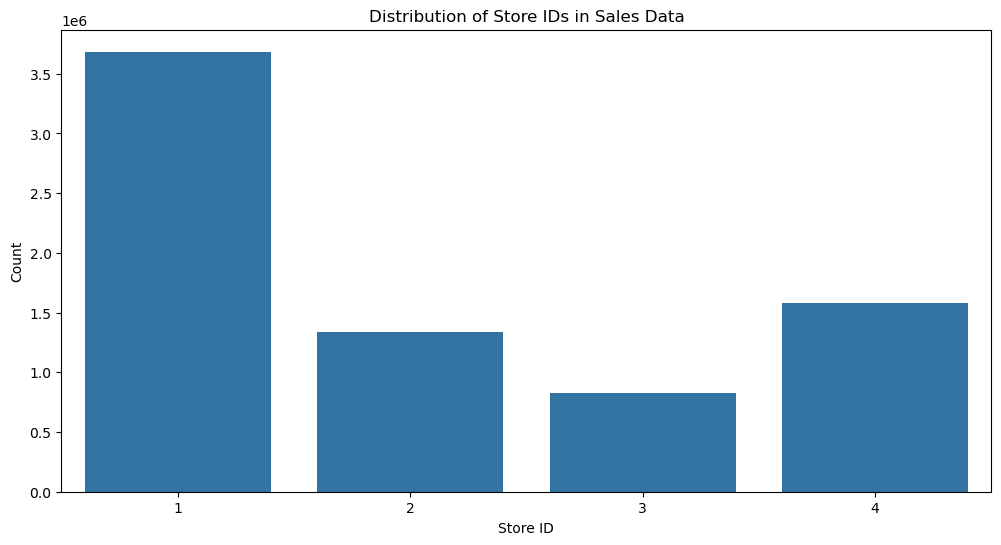

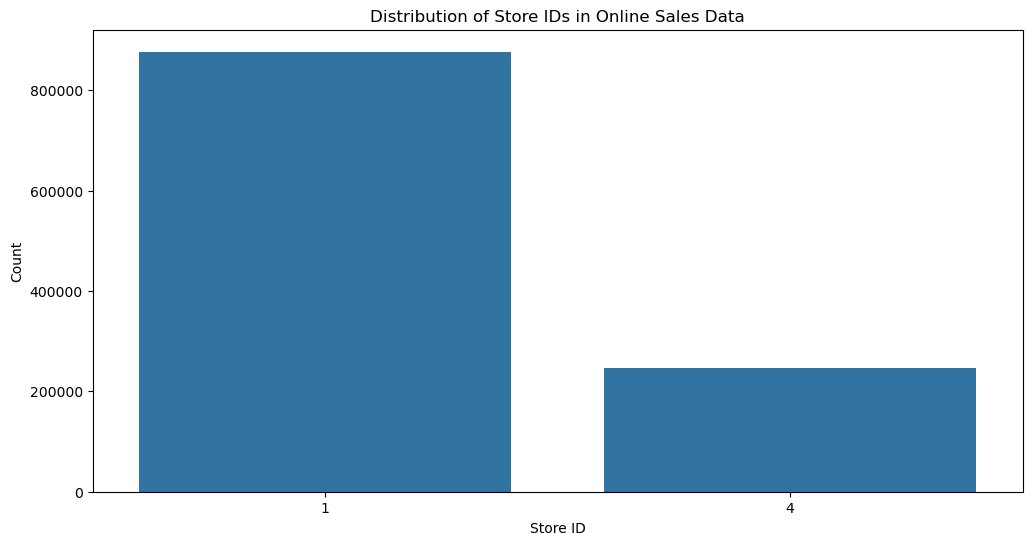

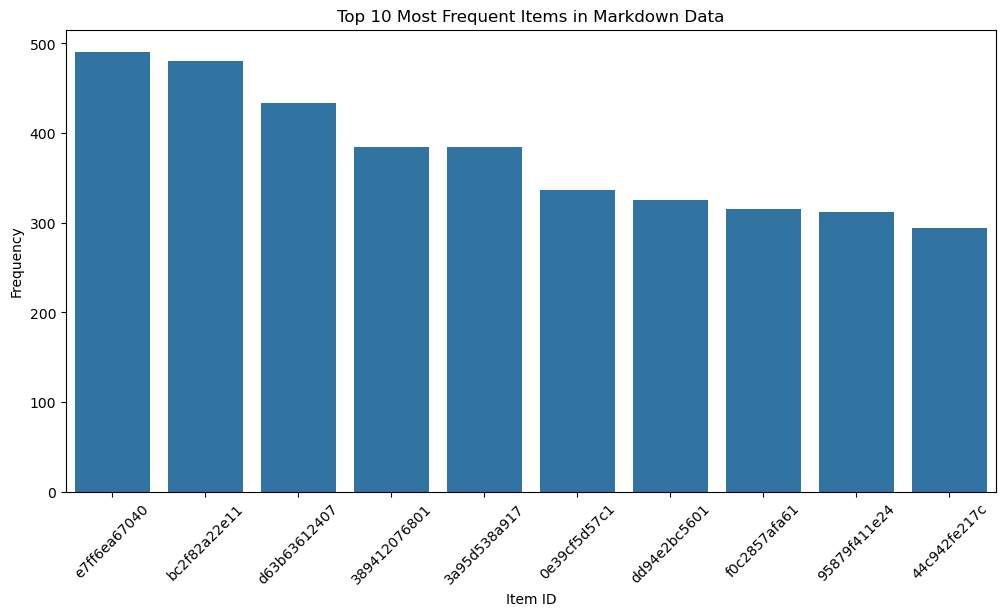

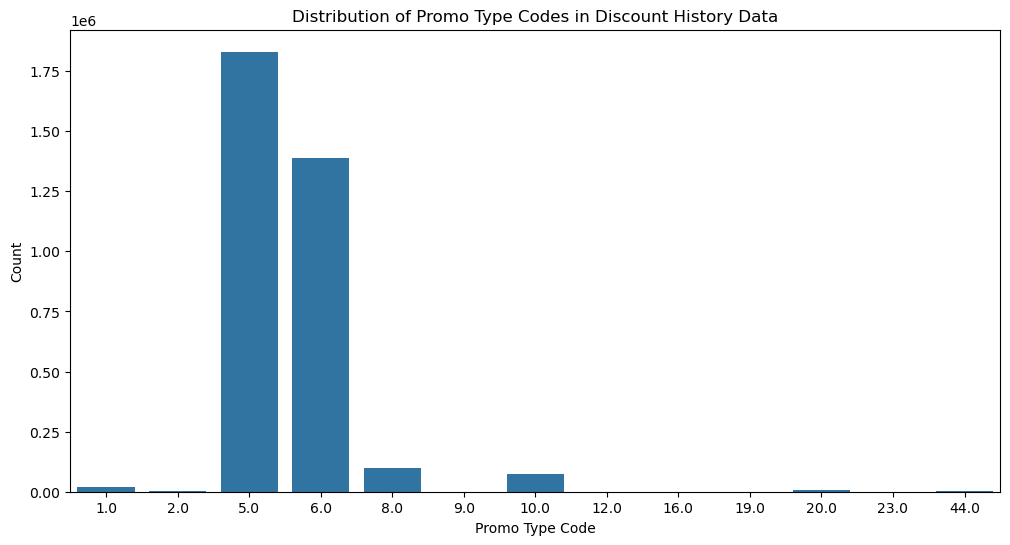

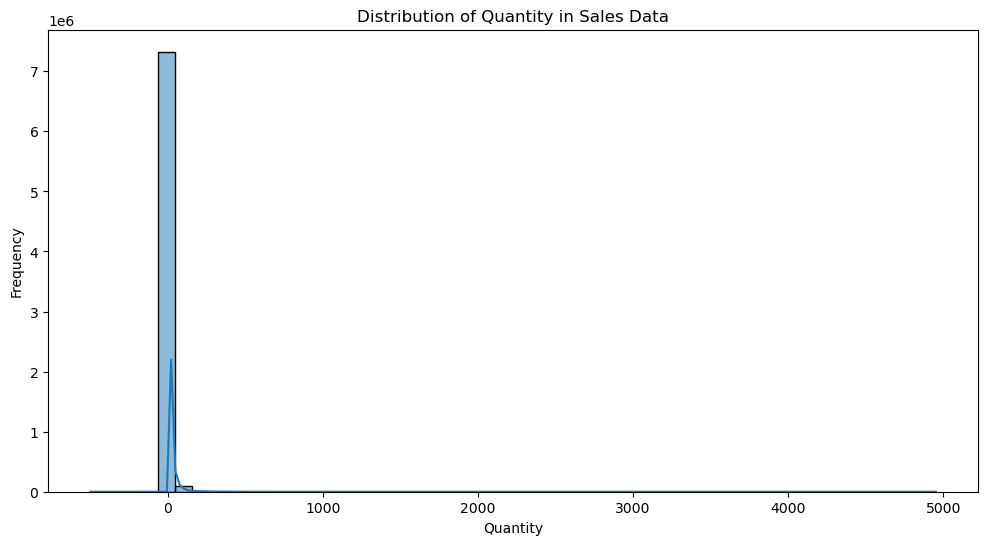

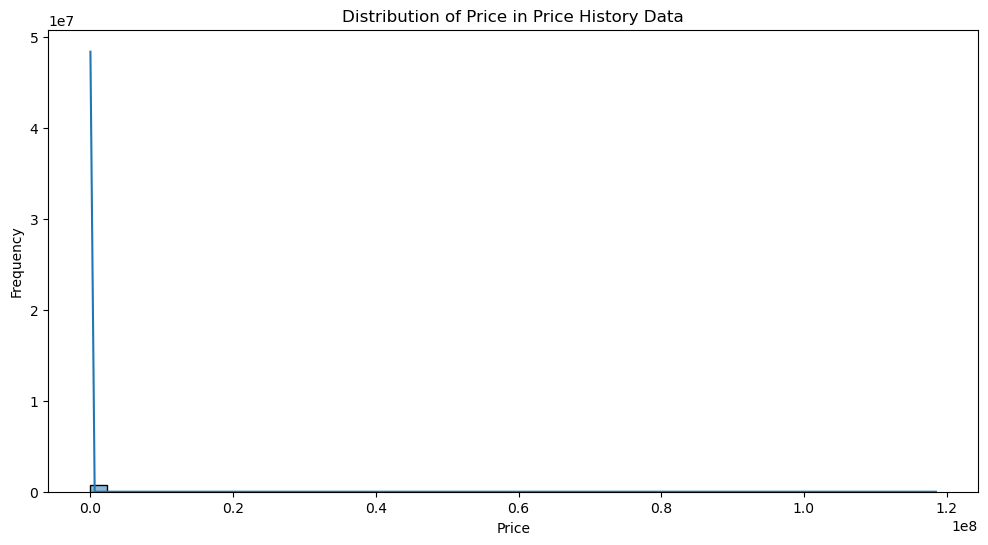

In [11]:
# Plot distribution of store_id across datasets
plt.figure(figsize=(12, 6))
sns.countplot(x='store_id', data=sales_df)
plt.title('Distribution of Store IDs in Sales Data')
plt.xlabel('Store ID')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='store_id', data=online_df)
plt.title('Distribution of Store IDs in Online Sales Data')
plt.xlabel('Store ID')
plt.ylabel('Count')
plt.show()

# Plot distribution of item_id in markdown_df
plt.figure(figsize=(12, 6))
top_items = markdown_df['item_id'].value_counts().head(10)
sns.barplot(x=top_items.index, y=top_items.values)
plt.title('Top 10 Most Frequent Items in Markdown Data')
plt.xlabel('Item ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of promo_type_code in discount_history_df
plt.figure(figsize=(12, 6))
sns.countplot(x='promo_type_code', data=discount_history_df)
plt.title('Distribution of Promo Type Codes in Discount History Data')
plt.xlabel('Promo Type Code')
plt.ylabel('Count')
plt.show()

# Plot distribution of quantity in sales_df
plt.figure(figsize=(12, 6))
sns.histplot(sales_df['quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity in Sales Data')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of price in price_history_df
plt.figure(figsize=(12, 6))
sns.histplot(price_history_df['price'], bins=50, kde=True)
plt.title('Distribution of Price in Price History Data')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# COLUMN RELATIONSHIP AND HOW MUCH THEY INFLUENCE EACHOTHER

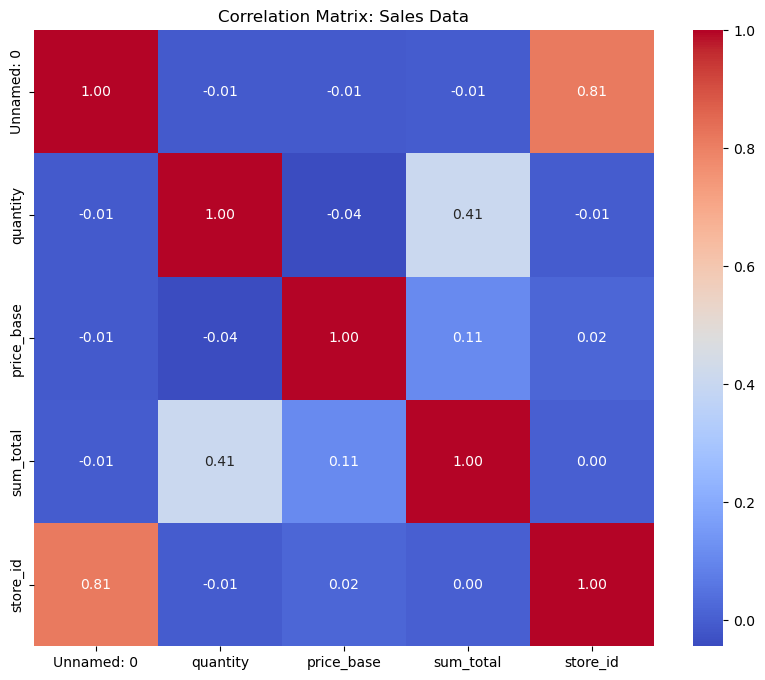

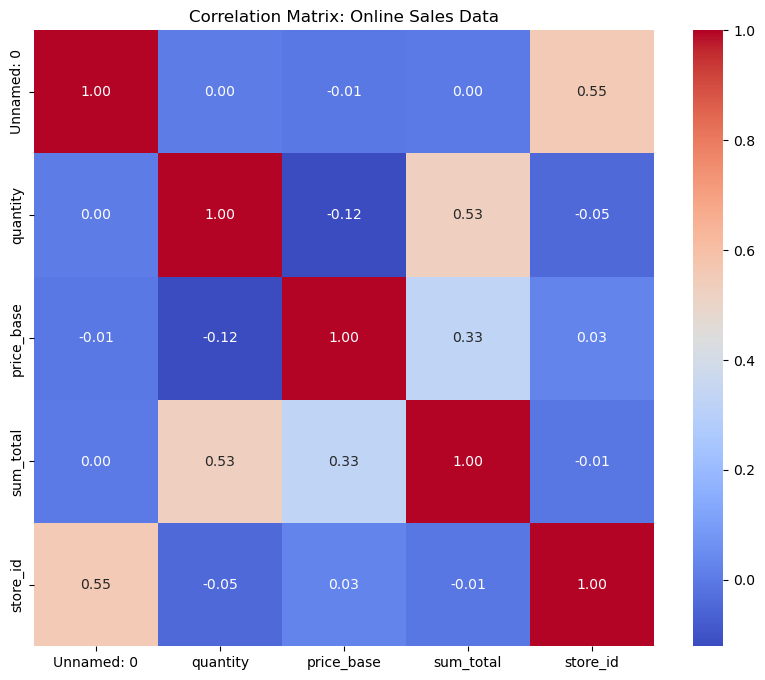

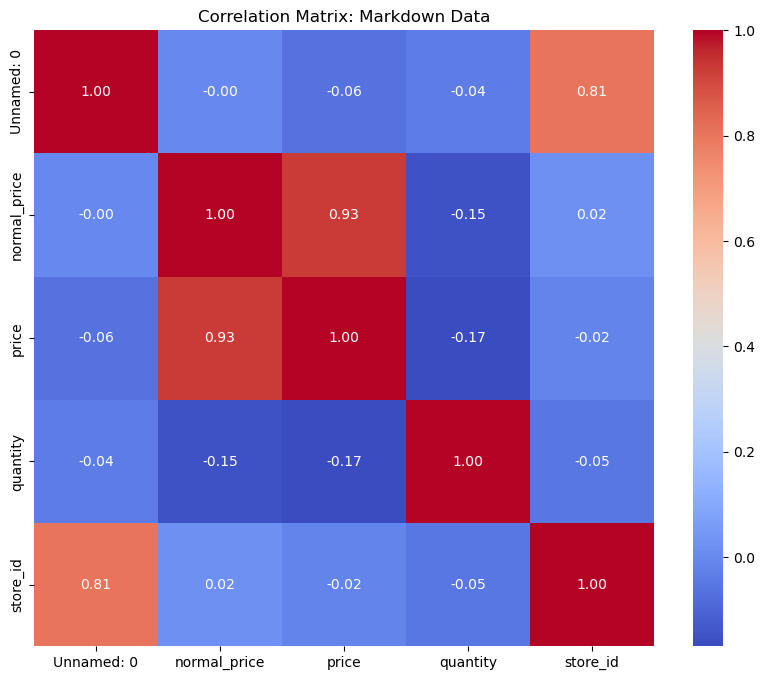

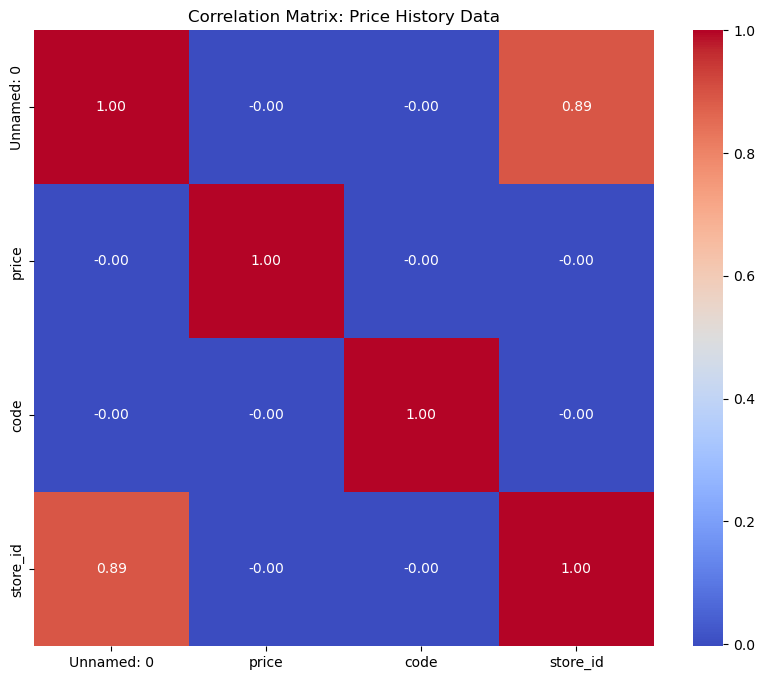

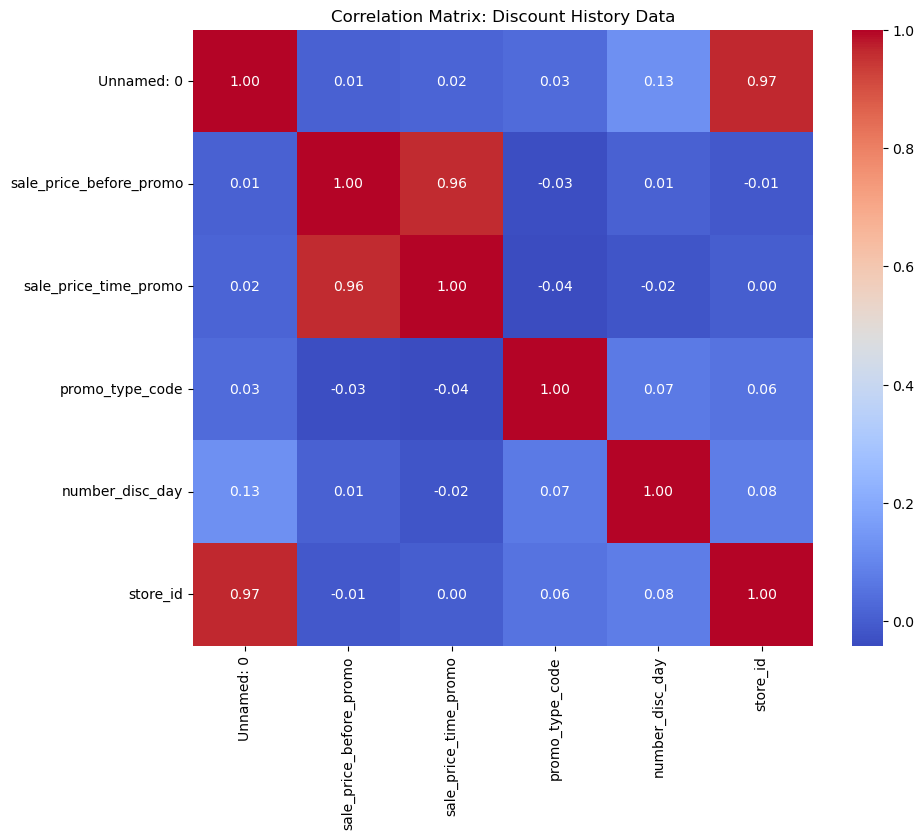

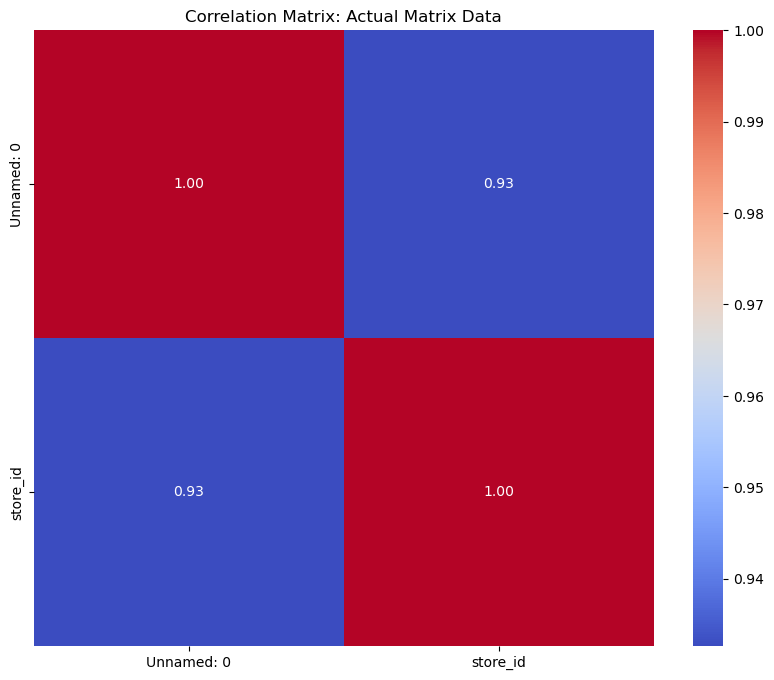

In [12]:
# Function to plot correlation matrix
def plot_correlation_matrix(df, title):
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()

# Plot correlation matrix for each dataset
plot_correlation_matrix(sales_df.select_dtypes(include=['float64', 'int64']), "Correlation Matrix: Sales Data")
plot_correlation_matrix(online_df.select_dtypes(include=['float64', 'int64']), "Correlation Matrix: Online Sales Data")
plot_correlation_matrix(markdown_df.select_dtypes(include=['float64', 'int64']), "Correlation Matrix: Markdown Data")
plot_correlation_matrix(price_history_df.select_dtypes(include=['float64', 'int64']), "Correlation Matrix: Price History Data")
plot_correlation_matrix(discount_history_df.select_dtypes(include=['float64', 'int64']), "Correlation Matrix: Discount History Data")
plot_correlation_matrix(actual_matrix_df.select_dtypes(include=['float64', 'int64']), "Correlation Matrix: Actual Matrix Data")

# Data Preprocessing

In [13]:
# Merge all dataframes on common columns
merged_df = sales_df.merge(online_df, on=['item_id', 'date', 'store_id'], how='outer', suffixes=('_sales', '_online'))
merged_df = merged_df.merge(markdown_df, on=['item_id', 'date', 'store_id'], how='outer')
merged_df = merged_df.merge(price_history_df, on=['item_id', 'date', 'store_id'], how='outer', suffixes=('', '_price_history'))
merged_df = merged_df.merge(discount_history_df, on=['item_id', 'date', 'store_id'], how='outer', suffixes=('', '_discount_history'))
merged_df = merged_df.merge(actual_matrix_df, on=['item_id', 'date', 'store_id'], how='outer', suffixes=('', '_actual_matrix'))

# Display the first few rows of the merged dataframe
merged_df.head()

,Unnamed: 0_sales,date,item_id,quantity_sales,price_base_sales,sum_total_sales,store_id,Unnamed: 0_online,quantity_online,price_base_online,...,Unnamed: 0_price_history,price_price_history,code,Unnamed: 0_discount_history,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,Unnamed: 0_actual_matrix
0,NaN,2023-07-25,00003a396939,NaN,NaN,NaN,1,NaN,NaN,NaN,...,792520.0,0.0,1.000000e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2023-11-15,00061dc0a8a5,NaN,NaN,NaN,3,NaN,NaN,NaN,...,1620131.0,34.9,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2024-03-31,00061dc0a8a5,NaN,NaN,NaN,1,NaN,NaN,NaN,...,103430.0,12.9,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2024-03-31,00061dc0a8a5,NaN,NaN,NaN,2,NaN,NaN,NaN,...,1097602.0,12.9,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2024-03-31,00061dc0a8a5,NaN,NaN,NaN,3,NaN,NaN,NaN,...,1640595.0,12.9,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Remove rows with negative values in numerical columns
def remove_negative_values(df, dataset_name):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"Removing {negative_count} negative values from column '{col}' in {dataset_name}")
            df = df[df[col] >= 0]
    return df

# Clean
merged_df = remove_negative_values(merged_df, "Merged DataFrame")

Removing 1169 negative values from column 'quantity_sales' in Merged DataFrame
Removing 28 negative values from column 'price_base_sales' in Merged DataFrame
Removing 474 negative values from column 'sum_total_sales' in Merged DataFrame
Removing 4 negative values from column 'price_base_online' in Merged DataFrame


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical columns
merged_df[numerical_columns] = scaler.fit_transform(merged_df[numerical_columns])

# Display the first few rows of the scaled dataframe
merged_df.head()

,Unnamed: 0_sales,date,item_id,quantity_sales,price_base_sales,sum_total_sales,store_id,Unnamed: 0_online,quantity_online,price_base_online,...,Unnamed: 0_price_history,price_price_history,code,Unnamed: 0_discount_history,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,Unnamed: 0_actual_matrix
66,0.542326,2022-08-29,001829cb707d,0.000202,0.014855,0.000348,0.0,0.715256,0.002803,0.012096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,0.542953,2022-09-01,001829cb707d,0.000404,0.014855,0.000697,0.0,0.716503,0.002803,0.012096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,0.544943,2022-09-11,001829cb707d,0.000404,0.014112,0.000662,0.0,0.721810,0.002803,0.012096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,0.545888,2022-09-16,001829cb707d,0.001212,0.012906,0.001816,0.0,0.724171,0.002803,0.011208,...,NaN,NaN,NaN,0.005270,0.016674,0.013337,0.093023,08b76d3e-344c-11ed-ad4d-005056861040,0.001048,NaN
91,0.546227,2022-09-17,001829cb707d,0.001010,0.012906,0.001513,0.0,0.724803,0.002803,0.010676,...,NaN,NaN,NaN,0.005538,0.016674,0.013337,0.093023,08b76d3e-344c-11ed-ad4d-005056861040,0.002096,NaN


In [16]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_columns = merged_df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    merged_df[col] = merged_df[col].astype(str)  # Ensure all data is string type
    merged_df[col] = label_encoder.fit_transform(merged_df[col])

# Display the first few rows of the updated dataframe
merged_df.head()

,Unnamed: 0_sales,date,item_id,quantity_sales,price_base_sales,sum_total_sales,store_id,Unnamed: 0_online,quantity_online,price_base_online,...,Unnamed: 0_price_history,price_price_history,code,Unnamed: 0_discount_history,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,Unnamed: 0_actual_matrix
66,0.542326,1,0,0.000202,0.014855,0.000348,0.0,0.715256,0.002803,0.012096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4855,NaN,NaN
69,0.542953,4,0,0.000404,0.014855,0.000697,0.0,0.716503,0.002803,0.012096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4855,NaN,NaN
78,0.544943,14,0,0.000404,0.014112,0.000662,0.0,0.721810,0.002803,0.012096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4855,NaN,NaN
88,0.545888,19,0,0.001212,0.012906,0.001816,0.0,0.724171,0.002803,0.011208,...,NaN,NaN,NaN,0.005270,0.016674,0.013337,0.093023,225,0.001048,NaN
91,0.546227,20,0,0.001010,0.012906,0.001513,0.0,0.724803,0.002803,0.010676,...,NaN,NaN,NaN,0.005538,0.016674,0.013337,0.093023,225,0.002096,NaN


# Feature engineering

In [ ]:
To implement a predictive model, selecting the best target variable and features is crucial. Here's an explanation based on the data provided:

### **Target Variable**
The target variable is the value you want to predict. Based on the business problem (forecasting customer demand), the best target variable would likely be:
- **`quantity`**: This represents the number of items sold and directly aligns with the goal of predicting customer demand.

### **Features**
Features are the input variables that influence the target variable. Based on the datasets, the following features are relevant:

#### **Time-Based Features**
- **`date`**: Useful for capturing seasonality, trends, and time-based patterns in sales.
- **`number_disc_day`**: Indicates the number of discount days, which can influence sales.

#### **Product-Specific Features**
- **`item_id`**: Identifies the product and can help capture product-specific trends.
- **`normal_price`** and **`price`**: The price of the product, which directly impacts demand.
- **`sale_price_before_promo`** and **`sale_price_time_promo`**: Reflect the effect of promotions on sales.

#### **Store-Specific Features**
- **`store_id`**: Helps capture store-specific trends and demand variations.

#### **Promotion and Discount Features**
- **`promo_type_code`**: Indicates the type of promotion, which can influence customer behavior.
- **`number_disc_day`**: Reflects the duration of discounts, which can impact sales.

#### **Aggregated Features**
- **`sum_total_sales`** and **`sum_total_online`**: Provide aggregated sales data, which can help capture overall demand trends.

#### **Other Features**
- **`price_base_sales`** and **`price_base_online`**: Represent the base price of items, which can influence demand.

### **Feature Engineering**
You can also create additional features to improve the model:
- **Lag Features**: Previous sales data (e.g., sales in the last week/month) to capture trends.
- **Rolling Averages**: Average sales over a specific period to smooth out fluctuations.
- **Seasonality Indicators**: Features like month, day of the week, or holiday indicators.

### **Exclusions**
Avoid using features that:
- Are highly correlated with the target (e.g., `sum_total` if it directly depends on `quantity`).
- Have too many missing values or irrelevant information (e.g., `Unnamed: 0` columns).

By selecting the right target and features, you can build a robust predictive model that aligns with the business objective of forecasting customer demand.

In [17]:
# Function to create lag features
def create_lag_features(df, columns, lags):
    for col in columns:
        for lag in lags:
            df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return df

# Define columns for which to create lag features
columns_to_lag = ['quantity_sales', 'price_base_sales', 'sum_total_sales', 'quantity_online', 'price_base_online', 'sum_total_online']

# Define lag periods
lag_periods = [1, 7, 30]  # Example: 1-day, 7-day, and 30-day lags

# Create lag features
merged_df = create_lag_features(merged_df, columns_to_lag, lag_periods)

# Display the first few rows of the dataframe with lag features
merged_df.head()

,Unnamed: 0_sales,date,item_id,quantity_sales,price_base_sales,sum_total_sales,store_id,Unnamed: 0_online,quantity_online,price_base_online,...,sum_total_sales_lag_30,quantity_online_lag_1,quantity_online_lag_7,quantity_online_lag_30,price_base_online_lag_1,price_base_online_lag_7,price_base_online_lag_30,sum_total_online_lag_1,sum_total_online_lag_7,sum_total_online_lag_30
66,0.542326,1,0,0.000202,0.014855,0.000348,0.0,0.715256,0.002803,0.012096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,0.542953,4,0,0.000404,0.014855,0.000697,0.0,0.716503,0.002803,0.012096,...,NaN,0.002803,NaN,NaN,0.012096,NaN,NaN,0.003151,NaN,NaN
78,0.544943,14,0,0.000404,0.014112,0.000662,0.0,0.721810,0.002803,0.012096,...,NaN,0.002803,NaN,NaN,0.012096,NaN,NaN,0.003151,NaN,NaN
88,0.545888,19,0,0.001212,0.012906,0.001816,0.0,0.724171,0.002803,0.011208,...,NaN,0.002803,NaN,NaN,0.012096,NaN,NaN,0.003151,NaN,NaN
91,0.546227,20,0,0.001010,0.012906,0.001513,0.0,0.724803,0.002803,0.010676,...,NaN,0.002803,NaN,NaN,0.011208,NaN,NaN,0.002919,NaN,NaN


In [18]:
# Function to create rolling average features
def create_rolling_average_features(df, columns, windows):
    for col in columns:
        for window in windows:
            df[f"{col}_rolling_avg_{window}"] = df[col].rolling(window=window, min_periods=1).mean()
    return df

# Define columns for which to create rolling averages
columns_to_roll = ['quantity_sales', 'price_base_sales', 'sum_total_sales', 
                   'quantity_online', 'price_base_online', 'sum_total_online']

# Define rolling window sizes
rolling_windows = [3, 7, 30]  # Example: 3-day, 7-day, and 30-day rolling averages

# Create rolling average features
merged_df = create_rolling_average_features(merged_df, columns_to_roll, rolling_windows)

# Display the first few rows of the dataframe with rolling average features
merged_df.head()

,Unnamed: 0_sales,date,item_id,quantity_sales,price_base_sales,sum_total_sales,store_id,Unnamed: 0_online,quantity_online,price_base_online,...,sum_total_sales_rolling_avg_30,quantity_online_rolling_avg_3,quantity_online_rolling_avg_7,quantity_online_rolling_avg_30,price_base_online_rolling_avg_3,price_base_online_rolling_avg_7,price_base_online_rolling_avg_30,sum_total_online_rolling_avg_3,sum_total_online_rolling_avg_7,sum_total_online_rolling_avg_30
66,0.542326,1,0,0.000202,0.014855,0.000348,0.0,0.715256,0.002803,0.012096,...,0.000348,0.002803,0.002803,0.002803,0.012096,0.012096,0.012096,0.003151,0.003151,0.003151
69,0.542953,4,0,0.000404,0.014855,0.000697,0.0,0.716503,0.002803,0.012096,...,0.000523,0.002803,0.002803,0.002803,0.012096,0.012096,0.012096,0.003151,0.003151,0.003151
78,0.544943,14,0,0.000404,0.014112,0.000662,0.0,0.721810,0.002803,0.012096,...,0.000569,0.002803,0.002803,0.002803,0.012096,0.012096,0.012096,0.003151,0.003151,0.003151
88,0.545888,19,0,0.001212,0.012906,0.001816,0.0,0.724171,0.002803,0.011208,...,0.000881,0.002803,0.002803,0.002803,0.011800,0.011874,0.011874,0.003074,0.003093,0.003093
91,0.546227,20,0,0.001010,0.012906,0.001513,0.0,0.724803,0.002803,0.010676,...,0.001007,0.002803,0.002803,0.002803,0.011327,0.011635,0.011635,0.002950,0.003031,0.003031


In [21]:
test_df = pd.read_csv('test.csv')
test_df.head(10)

,row_id;item_id;store_id;date
0,0;c578da8e8841;1;27.09.2024
1,1;c578da8e8841;1;28.09.2024
2,2;c578da8e8841;1;29.09.2024
3,3;c578da8e8841;1;30.09.2024
4,4;c578da8e8841;1;01.10.2024
5,5;c578da8e8841;1;02.10.2024
6,6;c578da8e8841;1;03.10.2024
7,7;c578da8e8841;1;04.10.2024
8,8;c578da8e8841;1;05.10.2024
9,9;c578da8e8841;1;06.10.2024


In [22]:
test_df.shape

(883680, 1)

In [23]:
# Create the train dataframe
train_df = merged_df[['item_id', 'store_id', 'date']].copy()

# Add a row_id column
train_df['row_id'] = range(len(train_df))

# Reorder columns to match the specified order
train_df = train_df[['row_id', 'item_id', 'store_id', 'date']]

# Adjust the shape to (883689, 1) by truncating or padding if necessary
train_df = train_df.iloc[:883689]

# Display the shape of the train dataframe
print(train_df.shape)

# Display the first few rows of the train dataframe
train_df.head()

(883689, 4)


,row_id,item_id,store_id,date
66,0,0,0.0,1
69,1,0,0.0,4
78,2,0,0.0,14
88,3,0,0.0,19
91,4,0,0.0,20


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Define features and target
X = train_df.drop(columns=['row_id', 'date'])  # Drop non-predictive columns
y = train_df['date']  # Assuming 'date' is the target variable

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse

# Sort models by RMSE
sorted_results = sorted(results.items(), key=lambda x: x[1])
print("Top 3 Models:")
for name, rmse in sorted_results[:3]:
    print(f"{name}: RMSE = {rmse}")